In [293]:
using DrWatson
@quickactivate  "Doran_etal_2022"



using NewickTree
using NewickTreeTools
using CSV, DataFrames
using StatsBase
using StatsPlots
theme(:default, grid=false, label=false)
plotlyjs()
include(srcdir("helpers.jl"))

compose (generic function with 1 method)

In [88]:
hugdir = datadir("exp_pro","banfield_etal_data","justbacteria_data")
UPdir = projectdir("_research", "UP7047_neighborjoined_spitree")
CSBdir = datadir("exp_pro","BB669")
pdir = plotsdir("subtrees_for_UP_CSB_Hug") |> mkpath

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug"

## Plot Hug et al. subtrees

In [257]:
hugspitree = readnw(open(readline, joinpath(hugdir, "spitree.neighborjoined.supporttree.nw")))
hugspitree = as_polytomy(x->NewickTree.support(x)<0.5, hugspitree)

(((((((((((((((Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Actinomycetales_Propionibacterineae_Nocardioidaceae_Marmoricola_sp._URHB0036:0.3235413,Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Actinomycetales_Propionibacterineae_Nocardioidaceae_Nocardioides_sp._JS614:0.3895708,Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Actinomycetales_Propionibacterineae_Nocardioidaceae_Nocardioidaceae_bacterium_Broad_1_cont1.61:0.2242268)1.0:0.1372523,Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Actinomycetales_Propionibacterineae_Nocardioidaceae_Kribbella_flavida_DSM_17836:0.1820082)0.97:0.06913664,Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Actinomycetales_Propionibacterineae_Nocardioidaceae_Aeromicrobium_marinum_DSM_15272:0.3847064)0.9299999999999999:0.05348872,Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Actinomycetales_Propionibacterineae_Nocardioidaceae_Actinopolymorpha_alba_DSM_45243:0.2464804)0.898:0.04119401,Bacteria_Actinoba

In [258]:
leafnames = getleafnames(hugspitree)
leaves = getleaves(hugspitree);

In [259]:
hugtaxadf = CSV.read(joinpath(hugdir, "subset_lineage.csv"), DataFrame);
hugtaxadf = hugtaxadf[indexin(leafnames, hugtaxadf.ORGANISM), [:ORGANISM, :kingdom, :phylum, :class, :order, :family, :genus, :species]];
hugtaxadf = coalesce.(hugtaxadf, "");

### Hadrus

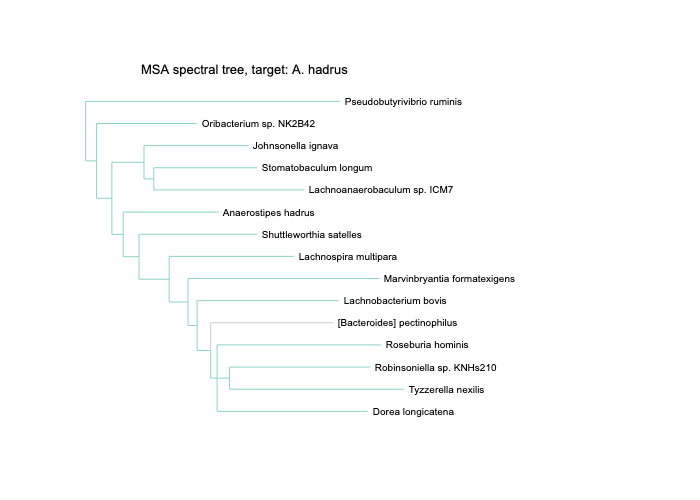

In [132]:
leafid = leafnames[findall(x-> occursin("hadrus", x), leafnames)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 4)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(hugtaxadf[indexin(getleafnames(node), hugtaxadf.ORGANISM), :family])
    grp == "" ? "#cccccc" : "#8DD3C7"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = hugtaxadf.species[name(node) .== hugtaxadf.ORGANISM][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="MSA spectral tree, target: A. hadrus",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,200),
)

In [133]:
savefig(joinpath(pdir, "MSA_spectraltree_subsetaround_Ahadrus.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/MSA_spectraltree_subsetaround_Ahadrus.pdf"

In [141]:
hugtaxadf[findall(x->occursin("Bifidobacterium", x), hugtaxadf.genus), [:kingdom, :phylum, :class, :order, :family, :genus, :species]]

1×7 DataFrame
 Row │ kingdom   phylum          class          order              family      ⋯
     │ String15  String          String         String             String      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteria  Actinobacteria  Actinomycetia  Bifidobacteriales  Bifidobacte ⋯
                                                               3 columns omitted

In [144]:
hugtaxadf.ORGANISM[findall(x->occursin("Bifidobacterium", x), hugtaxadf.genus)][1]

"Bacteria_Actinobacteria_Actinobacteria_Actinobacteridae_Bifidobacteriales_Bifidobacteriaceae_Bifidobacterium_animalis_animalis_ATCC_25527"

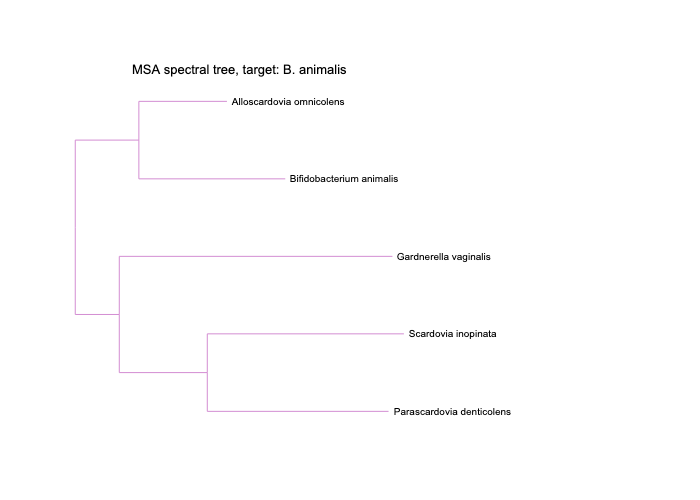

In [154]:
leafid = hugtaxadf.ORGANISM[findall(x->occursin("Bifidobacterium", x), hugtaxadf.genus)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 2)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(hugtaxadf[indexin(getleafnames(node), hugtaxadf.ORGANISM), :family])
    grp == "Bifidobacteriaceae" ? "#d38dd2" : "#CCCCCC"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = hugtaxadf.species[name(node) .== hugtaxadf.ORGANISM][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="MSA spectral tree, target: B. animalis",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,200),
)

In [155]:
savefig(joinpath(pdir, "MSA_spectraltree_subsetaround_Banimalis.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/MSA_spectraltree_subsetaround_Banimalis.pdf"

In [171]:
hugtaxadf[findall(x->occursin("Bacteroidales", x), hugtaxadf.order), [:kingdom, :phylum, :class, :order, :family, :genus, :species]]

16×7 DataFrame
 Row │ kingdom   phylum         class        order          family             ⋯
     │ String15  String         String       String         String             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae      ⋯
   2 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae
   3 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Odoribacteraceae
   4 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Odoribacteraceae
   5 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Tannerellaceae     ⋯
   6 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Barnesiellaceae
   7 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Tannerellaceae
   8 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Barnesiellaceae
   9 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Dysgonomonadaceae  ⋯
  10 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Porphyromonadaceae
  11 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Dysgonomonadaceae
  12 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Prevotellaceae
  13 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Prevotellaceae     ⋯
  14 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Prevotellaceae
  15 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Prevotellaceae
  16 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Paludibacteraceae
                                                               2 columns omitted

In [164]:
hugtaxadf[findall(x->occursin("finegoldii", x), hugtaxadf.species), [:kingdom, :phylum, :class, :order, :family, :genus, :species]]

1×7 DataFrame
 Row │ kingdom   phylum         class        order          family         gen ⋯
     │ String15  String         String       String         String         Str ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Rikenellaceae  Ali ⋯
                                                               2 columns omitted

In [165]:
hugtaxadf.ORGANISM[findall(x->occursin("finegoldii", x), hugtaxadf.species)][1]

"Bacteria_Bacteroidetes_Chlorobi_group_Bacteroidetes_Bacteroidia_Bacteroidales_Rikenellaceae_Alistipes_finegoldii_AHN_2437_DSM_17242"

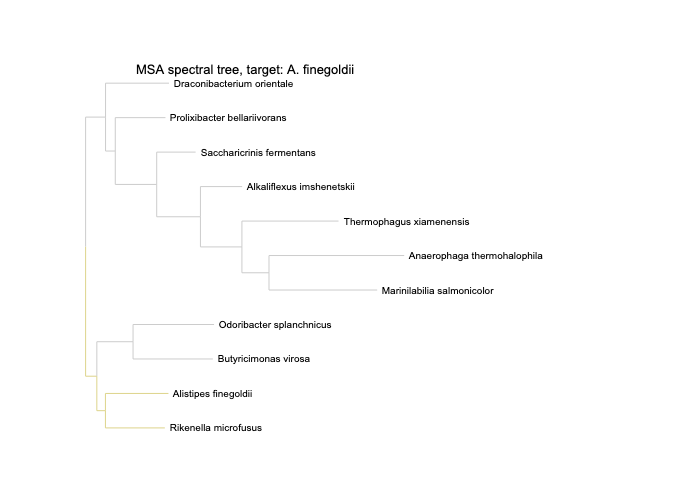

In [260]:
leafid = hugtaxadf.ORGANISM[findall(x->occursin("finegoldii", x), hugtaxadf.species)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 3)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(hugtaxadf[indexin(getleafnames(node), hugtaxadf.ORGANISM), :family])
    grp == "Rikenellaceae" ? "#ddd48b" : "#CCCCCC"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = hugtaxadf.species[name(node) .== hugtaxadf.ORGANISM][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="MSA spectral tree, target: A. finegoldii",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,500),
)

In [175]:
savefig(joinpath(pdir, "MSA_spectraltree_subsetaround_Afinegoldii.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/MSA_spectraltree_subsetaround_Afinegoldii.pdf"

In [186]:
tstdf = hugtaxadf[findall(x->occursin("Enterobacteriaceae", x), hugtaxadf.family), [:kingdom, :phylum, :class, :order, :family, :genus, :species]]

19×7 DataFrame
 Row │ kingdom   phylum          class                order             family ⋯
     │ String15  String          String               String            String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero ⋯
   2 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
   3 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
   4 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
   5 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero ⋯
   6 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
   7 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
   8 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
  ⋮  │    ⋮            ⋮                  ⋮                  ⋮                 ⋱
  13 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero ⋯
  14 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
  15 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
  16 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
  17 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero ⋯
  18 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
  19 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero
                                                    3 columns and 4 rows omitted

In [184]:
tstdf = hugtaxadf[findall(x->occursin("Proteobacteria", x), hugtaxadf.phylum), [:kingdom, :phylum, :class, :order, :family, :genus, :species]]

449×7 DataFrame
 Row │ kingdom   phylum          class                  order              fam ⋯
     │ String15  String          String                 String             Str ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteria  Proteobacteria  Alphaproteobacteria    Hyphomicrobiales   Par ⋯
   2 │ Bacteria  Proteobacteria  Alphaproteobacteria    Hyphomicrobiales   Hyp
   3 │ Bacteria  Proteobacteria  Alphaproteobacteria
   4 │ Bacteria  Proteobacteria  Alphaproteobacteria    Hyphomonadales     Hyp
   5 │ Bacteria  Proteobacteria  Alphaproteobacteria    Hyphomonadales     Hyp ⋯
   6 │ Bacteria  Proteobacteria  Alphaproteobacteria    Hyphomonadales     Hyp
   7 │ Bacteria  Proteobacteria  Alphaproteobacteria    Maricaulales       Mar
   8 │ Bacteria  Proteobacteria  Alphaproteobacteria    Maricaulales       Mar
  ⋮  │    ⋮            ⋮                   ⋮                    ⋮              ⋱
 443 │ Bacteria  Proteobacteria  Deltaproteobacteria    Desulfurellales    Des ⋯
 444 │ Bacteria  Proteobacteria  Deltaproteobacteria    Desulfurellales    Des
 445 │ Bacteria  Proteobacteria  Epsilonproteobacteria  Nautiliales        Nau
 446 │ Bacteria  Proteobacteria  Epsilonproteobacteria  Nautiliales        Nau
 447 │ Bacteria  Proteobacteria  Epsilonproteobacteria  Nautiliales        Nau ⋯
 448 │ Bacteria  Proteobacteria  Epsilonproteobacteria  Campylobacterales  Thi
 449 │ Bacteria  Proteobacteria  Epsilonproteobacteria  Campylobacterales  Arc
                                                  3 columns and 434 rows omitted

In [185]:
sort(countmap(tstdf.family), byvalue=true, rev=true)

OrderedCollections.OrderedDict{String, Int64} with 143 entries:
  "Roseobacteraceae"       => 24
  ""                       => 22
  "Enterobacteriaceae"     => 19
  "Rhodobacteraceae"       => 14
  "Comamonadaceae"         => 12
  "Oceanospirillaceae"     => 11
  "Pasteurellaceae"        => 10
  "Desulfobacteraceae"     => 10
  "Alcaligenaceae"         => 9
  "Chromatiaceae"          => 9
  "Acetobacteraceae"       => 9
  "Neisseriaceae"          => 8
  "Methylococcaceae"       => 8
  "Phyllobacteriaceae"     => 7
  "Burkholderiaceae"       => 7
  "Rhodospirillaceae"      => 7
  "Ectothiorhodospiraceae" => 7
  "Chromobacteriaceae"     => 7
  "Alteromonadaceae"       => 6
  ⋮                        => ⋮

In [188]:
hugtaxadf[findall(x->occursin("Klebsiella pneumoniae", x), hugtaxadf.species), [:kingdom, :phylum, :class, :order, :family, :genus, :species]]

1×7 DataFrame
 Row │ kingdom   phylum          class                order             family ⋯
     │ String15  String          String               String            String ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacterales  Entero ⋯
                                                               3 columns omitted

In [189]:
hugtaxadf.ORGANISM[findall(x->occursin("Klebsiella pneumoniae", x), hugtaxadf.species)][1]

"Bacteria_Proteobacteria_Alphaproteobacteria_Rhodobacterales_Rhodobacteraceae_Nereida_ignava_DSM_16309"

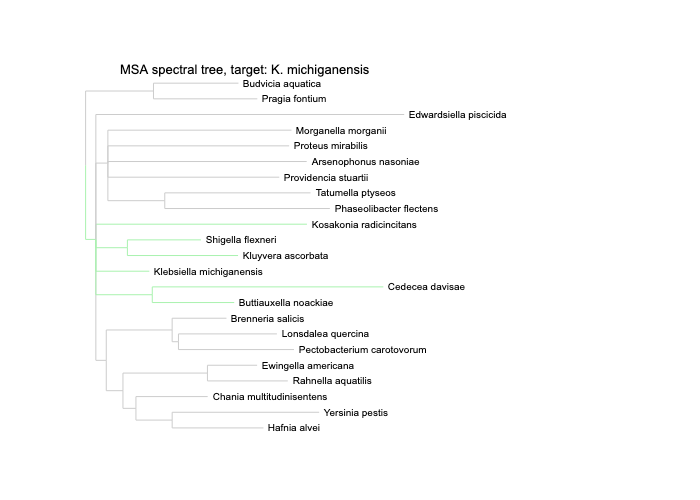

In [200]:
leafid = hugtaxadf.ORGANISM[findall(x->occursin("Klebsiella michiganensis", x), hugtaxadf.species)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 2)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(hugtaxadf[indexin(getleafnames(node), hugtaxadf.ORGANISM), :family])
    grp == "Enterobacteriaceae" ? "#a9f2af" : "#CCCCCC"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = hugtaxadf.species[name(node) .== hugtaxadf.ORGANISM][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="MSA spectral tree, target: K. michiganensis",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,500),
)

In [201]:
savefig(joinpath(pdir, "MSA_spectraltree_subsetaround_Kmichiganensis.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/MSA_spectraltree_subsetaround_Kmichiganensis.pdf"

## Plot UniProt subtrees

In [203]:
upspitree = readnw(open(readline, joinpath(UPdir, "2020_02_UP7047-supporttree.nw")))
upspitree = as_polytomy(x->NewickTree.support(x)<0.5, upspitree)

((((((((((((((((UP000220251:0.3681296,UP000000495:0.7054831,UP000031552:0.4500539)0.71:0.07324412,UP000001505:0.515416)0.8366666666666667:0.05146068,(UP000000529:0.8304454,UP000069902:0.4625929)0.63:0.132667)0.874:0.0437504,UP000031320:0.5283071)0.975:0.06329066,UP000000496:1.215079)0.9428571428571428:0.1666593,UP000196763:0.3919022)0.8725:0.02545351,UP000253816:0.1724787,UP000000431:0.3050015)0.866:0.01776252,UP000196862:0.3726263,UP000196784:0.2678048)0.9575:0.07027833,UP000185544:0.591453)0.8838461538461538:0.01360717,UP000218046:0.4953882,UP000053785:0.4936864)0.766:0.004803309,((((UP000035039:0.345209,UP000029283:1.035116)0.77:0.08784236,UP000035018:0.5590247)0.885:0.2052429,UP000053697:0.3172342)0.7433333333333334:0.03277148,UP000242542:0.4476391)0.6775:0.03476413,(UP000195277:0.593108,UP000242922:0.662811)0.56:0.04725994)0.5272727272727273:0.00202137,(((((((((((((((((UP000002523:1.000336,UP000008323:0.05665735)0.89:0.2533052,UP000283896:0.0)1.0:0.206037,UP000037386:0.07790443)1.

In [204]:
leafnames = getleafnames(upspitree)
leaves = getleaves(upspitree);

In [207]:
UPtaxadf = CSV.read(datadir("exp_raw","UP7047","UProwmeta.csv"), DataFrame);
UPtaxadf = UPtaxadf[indexin(leafnames, UPtaxadf.Proteome_ID), [:Proteome_ID, :Kingdom, :Phylum, :Class, :Order, :Family, :Genus, :Species]];
UPtaxadf = coalesce.(UPtaxadf, "");

In [208]:
UPtaxadf

7047×8 DataFrame
  Row │ Proteome_ID  Kingdom   Phylum          Class                Order      ⋯
      │ String15     String15  String          String               String     ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ UP000220251  Bacteria  Chlamydiae      Chlamydiia           Parachlamy ⋯
    2 │ UP000000495  Bacteria  Chlamydiae      Chlamydiia           Parachlamy
    3 │ UP000031552  Bacteria  Chlamydiae      Chlamydiia           Parachlamy
    4 │ UP000001505  Bacteria  Chlamydiae      Chlamydiia           Parachlamy
    5 │ UP000000529  Bacteria  Chlamydiae      Chlamydiia           Parachlamy ⋯
    6 │ UP000069902  Bacteria  Chlamydiae      Chlamydiia           Parachlamy
    7 │ UP000031320  Bacteria  Chlamydiae      Chlamydiia           Parachlamy
    8 │ UP000000496  Bacteria  Chlamydiae      Chlamydiia           Parachlamy
  ⋮   │      ⋮          ⋮            ⋮                  ⋮                  ⋮   ⋱
 7041 │ UP000049455  Bacteria  Proteobacteria  Alphaproteobacteria  Rhodobacte ⋯
 7042 │ UP000232137  Bacteria  Proteobacteria  Alphaproteobacteria  Rhodobacte
 7043 │ UP000019025  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobact
 7044 │ UP000244334  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobact
 7045 │ UP000007437  Bacteria  Proteobacteria  Betaproteobacteria   Burkholder ⋯
 7046 │ UP000282597  Bacteria  Proteobacteria  Betaproteobacteria   Burkholder
 7047 │ UP000053677  Bacteria  Proteobacteria  Betaproteobacteria   Burkholder
                                                 4 columns and 7032 rows omitted

In [210]:
UPtaxadf.Proteome_ID[findall(x->occursin("hadrus", x), UPtaxadf.Species)][1]

"UP000008960"

In [222]:
UPtaxadf[findall(x->occursin("hallii", x), UPtaxadf.Species), :]

1×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum      Class       Order          Family    ⋯
     │ String15     String15  String      String      String         String    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000018069  Bacteria  Firmicutes  Clostridia  Clostridiales  Eubacteri ⋯
                                                               3 columns omitted

In [216]:
UPtaxadf[findall(x->occursin("hadrus", x), UPtaxadf.Species), :]

1×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum      Class       Order          Family    ⋯
     │ String15     String15  String      String      String         String    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000008960  Bacteria  Firmicutes  Clostridia  Clostridiales  Lachnospi ⋯
                                                               3 columns omitted

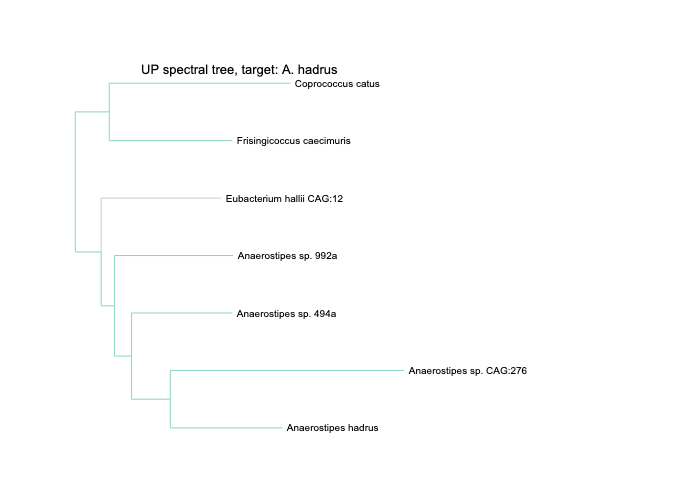

In [221]:
leafid = UPtaxadf.Proteome_ID[findall(x->occursin("hadrus", x), UPtaxadf.Species)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 5)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(UPtaxadf[indexin(getleafnames(node), UPtaxadf.Proteome_ID), :Family])
    grp == "Lachnospiraceae" ? "#8DD3C7" : "#cccccc"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = UPtaxadf.Species[name(node) .== UPtaxadf.Proteome_ID][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="UP spectral tree, target: A. hadrus",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,500),
)

In [223]:
savefig(joinpath(pdir, "UniProt_spectraltree_subsetaround_Ahadrus.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/UniProt_spectraltree_subsetaround_Ahadrus.pdf"

In [228]:
UPtaxadf[findall(x->occursin("Bifidobacterium longum", x), UPtaxadf.Species), :]

1×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum          Class           Order            ⋯
     │ String15     String15  String          String          String           ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000000439  Bacteria  Actinobacteria  Actinobacteria  Bifidobacteriale ⋯
                                                               4 columns omitted

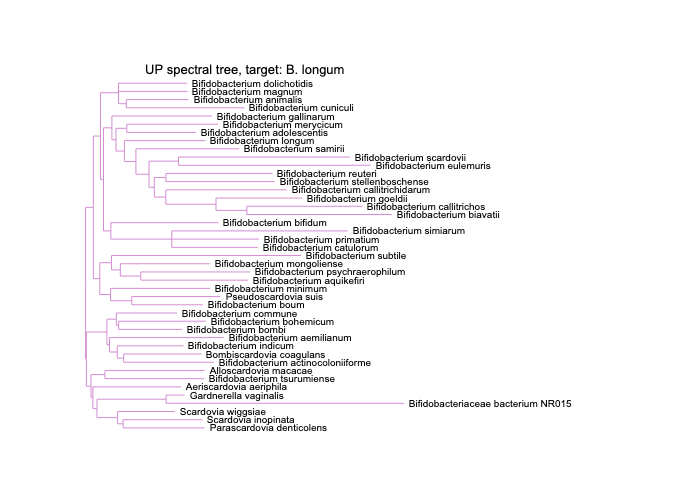

In [235]:
leafid = UPtaxadf.Proteome_ID[findall(x->occursin("Bifidobacterium longum", x), UPtaxadf.Species)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 7)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(UPtaxadf[indexin(getleafnames(node), UPtaxadf.Proteome_ID), :Family])
    grp == "Bifidobacteriaceae" ? "#d38dd2" : "#CCCCCC"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = UPtaxadf.Species[name(node) .== UPtaxadf.Proteome_ID][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="UP spectral tree, target: B. longum",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,500),
)

In [236]:
savefig(joinpath(pdir, "UniProt_spectraltree_subsetaround_Blongum.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/UniProt_spectraltree_subsetaround_Blongum.pdf"

In [238]:
UPtaxadf[findall(x->occursin("Klebsiella", x), UPtaxadf.Species), :]

5×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum          Class                Order       ⋯
     │ String15     String15  String          String               String      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000000265  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte ⋯
   2 │ UP000007841  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte
   3 │ UP000019190  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte
   4 │ UP000255382  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte
   5 │ UP000036622  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte ⋯
                                                               4 columns omitted

In [245]:
UPtaxadf[findall(x->occursin("Edwardsiella tarda", x), UPtaxadf.Species), :]

1×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum          Class                Order       ⋯
     │ String15     String15  String          String               String      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000219788  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte ⋯
                                                               4 columns omitted

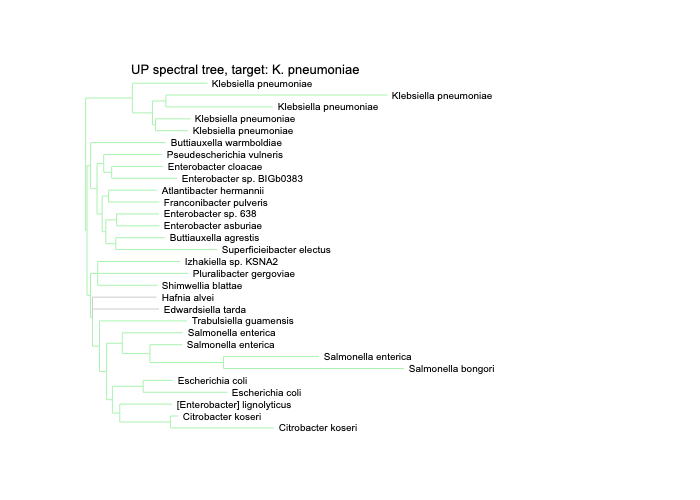

In [242]:
leafid = UPtaxadf.Proteome_ID[findall(x->occursin("Klebsiella", x), UPtaxadf.Species)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 4)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(UPtaxadf[indexin(getleafnames(node), UPtaxadf.Proteome_ID), :Family])
    grp == "Enterobacteriaceae" ? "#a9f2af" : "#CCCCCC"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = UPtaxadf.Species[name(node) .== UPtaxadf.Proteome_ID][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="UP spectral tree, target: K. pneumoniae",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,500),
)

In [243]:
savefig(joinpath(pdir, "UniProt_spectraltree_subsetaround_Kpneumoniae.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/UniProt_spectraltree_subsetaround_Kpneumoniae.pdf"

In [246]:
UPtaxadf[findall(x->occursin("finegoldii", x), UPtaxadf.Species), :]

1×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum         Class        Order          Famil ⋯
     │ String15     String15  String         String       String         Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000095517  Bacteria  Bacteroidetes  Bacteroidia  Bacteroidales  Bacte ⋯
                                                               3 columns omitted

In [ ]:
UPtaxadf[findall(x->occursin("Edwardsiella tarda", x), UPtaxadf.Species), :]

1×8 DataFrame
 Row │ Proteome_ID  Kingdom   Phylum          Class                Order       ⋯
     │ String15     String15  String          String               String      ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ UP000219788  Bacteria  Proteobacteria  Gammaproteobacteria  Enterobacte ⋯
                                                               4 columns omitted

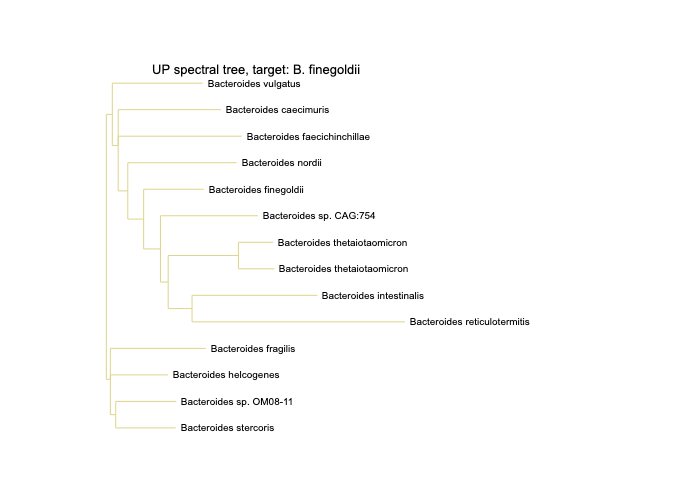

In [255]:
leafid = UPtaxadf.Proteome_ID[findall(x->occursin("finegoldii", x), UPtaxadf.Species)][1]
subtree = readnw(NewickTree.nwstr(compose(parent, 5)(leaves[leafid .== leafnames][1])))

branch_group_colors = map(prewalk(subtree)) do node
    grp = mode(UPtaxadf[indexin(getleafnames(node), UPtaxadf.Proteome_ID), :Family])
    grp == "Bacteroidaceae" ? "#ddd48b" : "#CCCCCC"
end |> x-> x[2:end] |> permutedims

for node in getleaves(subtree)
    nm = UPtaxadf.Species[name(node) .== UPtaxadf.Proteome_ID][1]
    NewickTree.setname!(node, nm)
end

# subtree_leafnames = getleaf

plot(subtree,
    title="UP spectral tree, target: B. finegoldii",
    titlefontsize=9,
    linecolor=branch_group_colors, 
    transform=false, fs=7, 
    rightmargin=5Plots.Measures.cm,
    size=(500,500),
)

In [256]:
savefig(joinpath(pdir, "UniProt_spectraltree_subsetaround_Bfinegoldii.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/UniProt_spectraltree_subsetaround_Bfinegoldii.pdf"

## CSB Tree & subtrees

In [322]:
csbspitree = readnw(open(readline, joinpath(CSBdir, "BB669_inferred_spitree_nj_outgrouped.nw")));
csbspitree = as_polytomy(n->NewickTree.support(n)<0.5, csbspitree)
ladderize!(csbspitree)

669

In [323]:
csbtaxadf = CSV.read(joinpath(CSBdir, "BB669_rowmeta.csv"), DataFrame);

In [326]:
csbtaxadf.family_ncbi |> countmap

Dict{Union{Missing, String31}, Int64} with 12 entries:
  String31("Bifidobacteriaceae")           => 30
  missing                                  => 4
  String31("Rikenellaceae")                => 9
  String31("Oscillospiraceae")             => 4
  String31("Bacteroidaceae")               => 229
  String31("Erysipelotrichaceae")          => 5
  String31("Odoribacteraceae")             => 4
  String31("Prevotellaceae")               => 14
  String31("Enterobacteriaceae")           => 1
  String31("Eubacteriales incertae sedis") => 1
  String31("Tannerellaceae")               => 21
  String31("Lachnospiraceae")              => 347

In [327]:
leaves = getleaves(csbspitree)
leafnames = getleafnames(csbspitree);

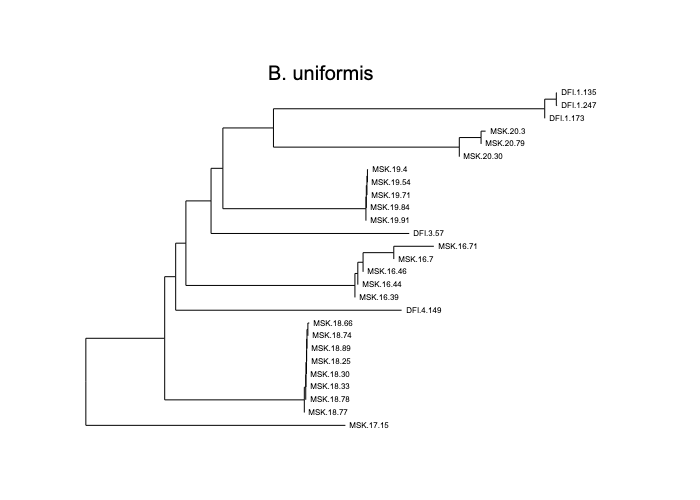

In [328]:
utaxaids = csbtaxadf[findall(x->occursin("uniformis",x), csbtaxadf.species_ncbi), :].ID
subtree = readnw(NewickTree.nwstr(collectiveLCA(leaves[indexin(utaxaids, leafnames)])))
plot(subtree,
    title="B. uniformis",
    rightmargin=20Plots.Measures.mm,
    fs=6,
)

In [329]:
savefig(joinpath(pdir, "CSB_Buniformis_donorvariance.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/CSB_Buniformis_donorvariance.pdf"

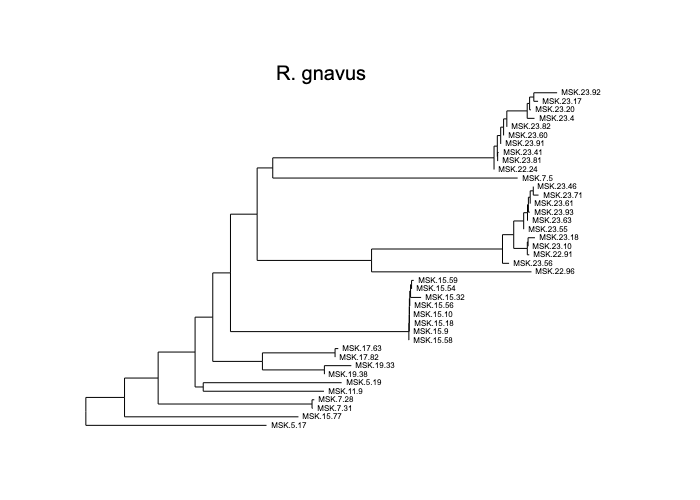

In [331]:
utaxaids = csbtaxadf[findall(x->occursin("gnavus",x), csbtaxadf.species_ncbi), :].ID
filter!(.!=("MSK.8.22"), utaxaids) # falls outsize main gnavus clade and with a couple unclassified strains near Dorea formicigenerans clade
subtree = readnw(NewickTree.nwstr(NewickTree.extract(csbspitree, utaxaids)))
plot(subtree,
    title="R. gnavus",
    rightmargin=20Plots.Measures.mm,
    fs=6
)

In [332]:
savefig(joinpath(pdir, "CSB_Rgnavus_donorvariance.pdf"))

"/Users/ben/projects/Doran_etal_2022/plots/subtrees_for_UP_CSB_Hug/CSB_Rgnavus_donorvariance.pdf"

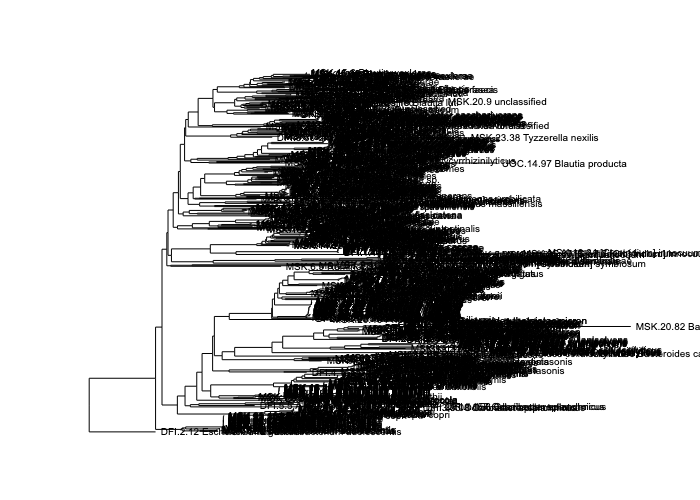

In [ ]:
plotcsbtree = deepcopy(csbspitree)

for node in getleaves(plotcsbtree)
    sp = csbtaxadf.species[name(node) .== csbtaxadf.ID][1]
    NewickTree.setname!(node, name(node) * " $sp")
end

plot(plotcsbtree, 
    transform=false,
    fs=7,
    size=(800,800),
)